## Word2Vec Explained

Tutorial found here: https://towardsdatascience.com/word2vec-explained-49c52b4ccb71

### Importing Data

In [3]:
# imports
import nltk
import pandas as pd
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

# constants
PATH = 'data/shakespeare.txt'
sw = stopwords.words('english')
plt.style.use('ggplot')
# nltk.download('stopwords')
# nltk.download('punkt')

In [11]:
# import data
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

### Preprocessing Data

#### Important Terms:

- **Stopwords**
    - "Filler" words with little or no meaning that help form a sentence.
    - Example: In the phrase "What is a motherboard?", we would only look at the word "motherboard" because [ "what", "is", "a" ] don't have significant meaning, only serving to create a grammatically correct sentence.

In [12]:
# remove new lines and lowercase all lines
lines = [ line.rstrip('\n').lower() for line in lines ]

# remove punctuations from each line
lines = [ line.translate(str.maketrans('', '', string.punctuation)) for line in lines ]

# tokenize each line, turning each line into a list of unique words
lines = [ word_tokenize(line) for line in lines ]

def remove_stopwords(lines: list[list[str]], sw = sw) -> list[list[str]]:
    """
    Removes stopwords from a given array of lines.

    PARAMS:
        lines ( list[list[str]] ): List of list of lines you want to remove stopwords from
        sw (Set): The set of stopwords you want to remove
    """

    res = []
    for line in lines:
        original = line
        line = [ w for w in line if w not in sw ]
        if len(line) < 1:
            line = original
        res.append(line)

    return res

filtered_lines = remove_stopwords(lines=lines, sw=sw)

### Obtaining the Embedding Data

In [13]:
w = w2v(filtered_lines, min_count=3, sg=1, window=7)

print(w.wv.most_similar('thou'))

[('thyself', 0.8340429067611694), ('art', 0.8192573189735413), ('villain', 0.7774289846420288), ('dost', 0.7729523181915283), ('wherefore', 0.7200782299041748), ('hast', 0.7101806998252869), ('kill', 0.7069992423057556), ('wilt', 0.6971310377120972), ('devil', 0.6892587542533875), ('fellow', 0.688782811164856)]


In [14]:
emb_df = (
    pd.DataFrame(
        [ w.wv.get_vector(str(n)) for n in w.wv.key_to_index ],
        index = w.wv.key_to_index
    )
)

print(emb_df.shape)
emb_df.head()

(11628, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
thou,-0.133088,0.094325,0.735614,0.671405,-0.557738,-0.711341,0.390268,0.460279,-0.370372,-0.288841,...,0.193732,0.028354,0.358083,0.117176,1.019439,0.611864,-0.523380,-0.236289,0.016030,0.499544
thy,0.013722,0.212082,0.537299,0.082395,0.167005,-0.191866,0.331654,0.510604,-0.135287,-0.444071,...,0.250308,-0.305248,0.488403,-0.212091,0.435958,0.254096,-0.090079,-0.376420,-0.050359,0.069020
shall,-0.023963,0.181451,-0.007479,0.007424,0.630428,-0.298541,0.121178,0.432129,-0.176544,0.231383,...,0.398175,0.082615,-0.061163,-0.204444,0.612396,0.128246,0.173047,-0.065504,0.306166,0.103473
thee,-0.431435,0.276851,0.374114,0.374049,0.061564,-0.299603,0.447940,0.412501,0.084078,-0.255812,...,0.145029,-0.021372,0.109499,-0.108788,0.808139,0.445928,0.149027,0.030214,0.341812,0.146067
good,-0.170398,0.312348,0.297813,-0.219587,0.270347,0.127015,0.339152,0.751706,-0.204781,0.106655,...,0.479847,-0.008000,0.298030,-0.089343,0.452030,-0.058212,0.117068,-0.138879,0.406164,-0.088615


### Plotting the Data

**More on PCA:**

https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186

[]

<Figure size 432x288 with 0 Axes>

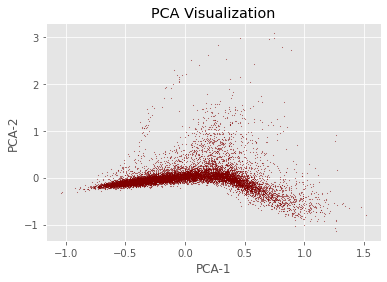

In [15]:
# Create a Principal Component Analysis model
pca = PCA(n_components=2, random_state=7)

# Train PCA model on our embedding data
pca_mdl = pca.fit_transform(emb_df)

# Plot Data
emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index=emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()